## **The Data**

### **Breast cancer wisconsin (diagnostic) dataset**

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2


**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign


 Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    Missing Attribute Values: None

    Class Distribution: 212 - Malignant, 357 - Benign

    Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    Donor: Nick Street

    Date: November, 1995



In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('cancer_classification.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


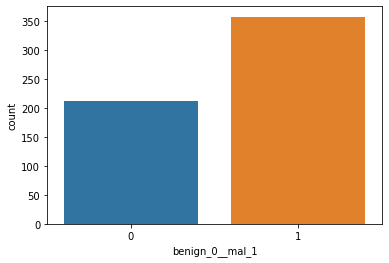

In [9]:
sns.countplot(x='benign_0__mal_1',data=df)

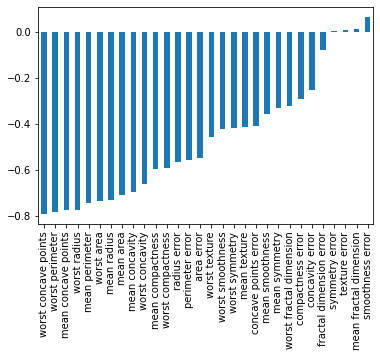

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [0]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train=scaler.fit_transform(X_train)

In [0]:
X_test=scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense,Dropout

In [25]:
X_train.shape

(426, 30)

In [0]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary classification 
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [30]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 0.7031 - val_loss: 0.6842
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6658 - val_loss: 0.6488
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6266 - val_loss: 0.6050
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5828 - val_loss: 0.5584
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5360 - val_loss: 0.5106
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4915 - val_loss: 0.4616
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4458 - val_loss: 0.4139
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3999 - val_loss: 0.3660
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3582 - val_loss: 0.3307
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3248 - val_loss: 0.2969
Epoch 11

In [0]:
losses=pd.DataFrame(model.history.history)

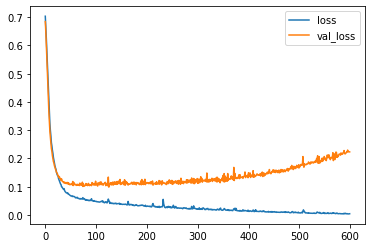

In [34]:
losses.plot()

In [0]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary classification 
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [38]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6935 - val_loss: 0.6730
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6599 - val_loss: 0.6464
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6327 - val_loss: 0.6176
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6001 - val_loss: 0.5800
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5566 - val_loss: 0.5298
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5046 - val_loss: 0.4694
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4437 - val_loss: 0.4067
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3864 - val_loss: 0.3499
Epoch 9/600
14/14 [==============================] - 0s 17ms/step - loss: 0.3370 - val_loss: 0.3040
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2969 - val_loss: 0.2677
Epoch 11

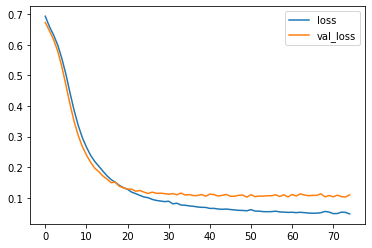

In [40]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [0]:
from tensorflow.keras.layers import Dropout

In [0]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#Binary classification 
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [45]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6889 - val_loss: 0.6776
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6800 - val_loss: 0.6677
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6744 - val_loss: 0.6557
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6545 - val_loss: 0.6408
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6422 - val_loss: 0.6158
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6057 - val_loss: 0.5903
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6011 - val_loss: 0.5629
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5845 - val_loss: 0.5345
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5626 - val_loss: 0.5074
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5528 - val_loss: 0.4821
Epoch 11/

In [0]:
model_loss=pd.DataFrame(model.history.history)

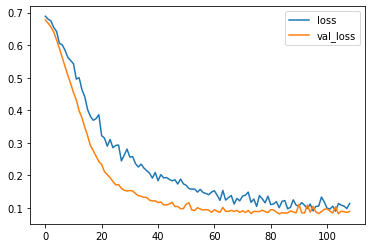

In [48]:
model_loss.plot()

In [0]:
predictions = model.predict_classes(X_test) 

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [55]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
